# K-Nearest Neighbors algorithm (KNN) From Scratch

### K-Nearest Neighbors algorithm (KNN)
- Supervised Learning (Classification).
- Non-linear Classifier.
- Using majority voting to classify.
- Using Euclidean distance to calculate the distances.
- Using k-fold Cross-Validation to get best K (KNN) in the provided range.

#### Using the K-Nearest Keigbors technique with majority voting to classify the data.

- Take the maximum k value as input (M) and find the best k that minimize the error by validate each k from 1 to (M). 
- Take the (L) as parameter which used to make a k-fold cross-validation (don't be confused butween k in KNN technique and the k in k-fold cross-validation they are different).

$$k = argmin_k(\bar{E_k})$$
where 
$$\bar{E_k} = \frac{1}{L}\sum_{l=1}^{L}E_l$$

### For more info please check:
- <a href="https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm">k-nearest neighbors algorithm</a>
- <a href="https://en.wikipedia.org/wiki/Euclidean_distance">Euclidean distance</a>
- <a href="https://en.wikipedia.org/wiki/Cross-validation_(statistics)">Cross-validation (statistics)</a>

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
class k_nearest_neighbors:
    def predict(self, X):
        if (hasattr(self, 'X') & hasattr(self, 'K') & hasattr(self, 't')):
            t_predicted = self.__predict(self.X, self.t, X, self.K)
            return t_predicted
        else:
            print('Please run fit in order to be able to use predict')
    
    def plot_avarage_error(self):
        if (hasattr(self, 'M') & hasattr(self, 'errors_mean')):
            plt.plot(range(1, self.M + 1), self.errors_mean)
            plt.xlabel('k')
            plt.xticks(range(1, self.M + 1))
            plt.ylabel('Avarage Error')
            plt.title('k vs Avarage Error')
            plt.show()
        else:
            print('Please run fit in order to be able to plot avarage error')
    
    def accuracy(self, y_actual, y_predicted):
        return np.mean(y_actual == y_predicted) * 100
    
    def __predict(self, X_train, t_train, X_predict, k):
        t_predicted = np.zeros(len(X_predict))
        
        for i, x in enumerate(X_predict):
            d = np.sqrt(np.sum((X_train - x)**2, axis=1))
            d_order = np.argsort(d)
            t_train_ordered = t_train[d_order]
            knn_classes = t_train_ordered[0:k]
            t_predicted[i] = stats.mode(knn_classes).mode[0]
        
        return t_predicted
    
    def fit(self, X, t, M, L = 10):
        if (int(M) != M or M <= 0 or int(L) != L or L <= 0):
            print("The maximum number of neighbors to check ( M ) or the number of partitions ( L ) "
                  + "must be integer more than zero")
            return

        self.N = len(t)
        
        if (L > self.N):
            print("The number of partitions ( L ) can't be more than the length of the entered data")
            return
        
        if (M > self.N):
            print("The maximum number of neighbors to check ( M ) "
                  + "can't be more than the length of the entered data")
            return

        self.X = X
        self.t = t
        self.M = M
        self.L = L
        
        self.errors_mean = np.zeros(self.M)
        
        partition = int(self.N/L)
        
        for k in range(self.M):
            k += 1
            err = 0
            
            for l in range(0, self.N, partition):
                X_training = np.append(self.X[0:l,:], self.X[l+partition:self.N,:], axis=0)
                t_training = np.append(self.t[0:l], self.t[l+partition:self.N], axis=0)
                
                X_validation = self.X[l:l+partition,:]
                t_validation = self.t[l:l+partition]
                
                t_predected = self.__predict(X_training, t_training, X_validation, k)
                
                err += np.mean(t_predected != t_validation)
                
            self.errors_mean[k-1] = err / L
            
        self.K = np.argmin(self.errors_mean) + 1
        
        print('Best K in the selected range (from 1 to {}) is {}'.format(self.M, self.K))

# Dataset 1

### Training

Best K in the selected range (from 1 to 20) is 20


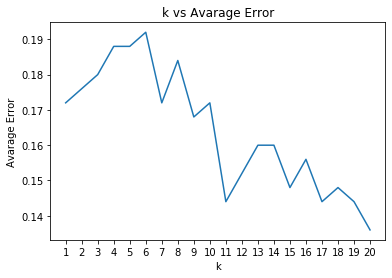

In [3]:
Data = np.genfromtxt('synth.tr.csv', delimiter=',', skip_header=True)
X = Data[:, 1:3]
t = Data[:, 3]

knn = k_nearest_neighbors()
knn.fit(X, t, 20)
knn.plot_avarage_error()

### Testing

In [4]:
Data_test = np.genfromtxt('synth.te.csv', delimiter=',', skip_header=True)
X_test = Data_test[:, 1:3]
y_actual = Data_test[:, 3]
y_predicted = knn.predict(X_test)
acc = knn.accuracy(y_actual, y_predicted)
print('Accuracy', acc, '%')

Accuracy 91.2 %


# Dataset 2

### Training

Best K in the selected range (from 1 to 10) is 1


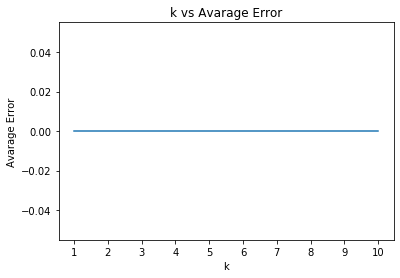

In [5]:
Data2 = np.genfromtxt('Data1.txt')
# Data2 = Data2[Data2[:,0] < 40] # Without outliers
X2 = Data2[:, 0:2]
t2 = np.array([1 if i >= 0 else 0 for i in Data2[:, 2]])

knn2 = k_nearest_neighbors()
knn2.fit(X2, t2, 10)
knn2.plot_avarage_error()

### Testing

In [6]:
Data2_test = np.genfromtxt('Test1.txt')
X2_test = Data2_test[:, 0:2]
y2_actual = np.array([1 if i >= 0 else 0 for i in Data2_test[:, 2]])
y2_predicted = knn2.predict(X2_test)
acc2 = knn2.accuracy(y2_actual, y2_predicted)
print('Accuracy', acc2, '%')

Accuracy 100.0 %


# Dataset 3

### Training

In [7]:
from sklearn.datasets import make_classification


Best K in the selected range (from 1 to 10) is 5


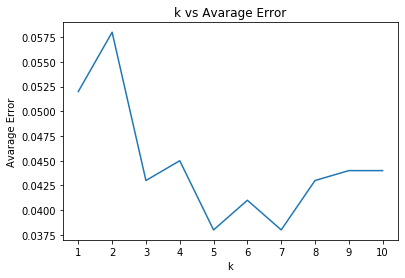

In [8]:
X3, t3 = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14, class_sep=1, n_classes=2)

knn3 = k_nearest_neighbors()
knn3.fit(X3, t3, 10)
knn3.plot_avarage_error()

### Testing

In [9]:
X3_test, y3_actual = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14, class_sep=1, n_classes=2)

y3_predicted = knn3.predict(X3_test)
acc3 = knn3.accuracy(y3_predicted, y3_actual)
print('Accuracy', acc3, '%')

Accuracy 99.0 %
